In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("botswana_bank_customer_churn.csv")

In [3]:
# Thông tin cơ bản về dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [4]:
print("Mô tả dữ liệu ban đầu:")
print(data.describe().T)

Mô tả dữ liệu ban đầu:
                          count           mean           std      min  \
RowNumber              115640.0   57820.500000  33382.536902     1.00   
Number of Dependents   115640.0       2.502923      1.707249     0.00   
Income                 115640.0   52641.363046  27429.756390  5000.96   
Customer Tenure        115640.0      15.490591      8.654217     1.00   
Credit Score           115640.0     574.299775    159.067499   300.00   
Credit History Length  115640.0      15.546602      8.654630     1.00   
Outstanding Loans      115640.0   25502.731792  14127.859827  1000.43   
Churn Flag             115640.0       0.121878      0.327147     0.00   
Balance                115640.0  124639.209748  72210.476638     1.06   
NumOfProducts          115640.0       2.999274      1.411361     1.00   
NumComplaints          115640.0       4.991724      3.159283     0.00   

                             25%         50%          75%        max  
RowNumber              28910.

In [5]:
print(data.head())

   RowNumber                            CustomerId   Surname First Name  \
0          1  83ef0b54-35f6-4f84-af58-5653ac0c0dc4     Smith       Troy   
1          2  009f115a-e5ca-4cf4-97d6-530140545e4e  Sullivan    Katrina   
2          3  66309fd3-5009-44d3-a3f7-1657c869d573    Fuller      Henry   
3          4  b02a30df-1a5f-4087-8075-2a35432da641     Young    Antonio   
4          5  0d932e5b-bb3a-4104-8c83-f84270f7f2ea  Andersen       John   

  Date of Birth  Gender Marital Status  Number of Dependents  \
0     8/29/1987    Male       Divorced                     3   
1      2/7/2000  Female        Married                     1   
2      2/3/1954  Female         Single                     1   
3     1/15/1991  Female       Divorced                     5   
4      4/8/1992  Female       Divorced                     2   

                        Occupation    Income  ...  \
0      Information systems manager  77710.14  ...   
1               Charity fundraiser  58209.87  ...   
2  Te

In [6]:
# Kiểm tra missing values
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
NumOfProducts     

In [7]:
# Xử lý missing values bằng cách thay thế với giá trị trung vị
data.fillna(data.median(numeric_only=True), inplace=True)

# Chuyển đổi cột "Date of Birth" thành tuổi
data["Date of Birth"] = pd.to_datetime(data["Date of Birth"], errors="coerce")
data["Age"] = (pd.to_datetime("today") - data["Date of Birth"]).dt.days // 365
data.drop(columns=["Date of Birth"], inplace=True)

# Loại bỏ các cột không cần thiết
columns_to_drop = [
    'RowNumber', 'CustomerId', 'Surname', 'First Name',
    'Occupation', 'Address', 'Contact Information',
    'Churn Reason', 'Churn Date'
]
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

# Chuyển đổi dữ liệu category sang One-hot encoding
categorical_cols = ["Gender", "Marital Status", "Education Level", "Customer Segment", "Preferred Communication Channel"]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Chuẩn hóa các biến numeric
scaler = StandardScaler()
numeric_cols = ["Income", "Balance", "Outstanding Loans", "Credit Score", "Customer Tenure", "Credit History Length", "Age"]
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [8]:
print("Dữ liệu sau khi chuẩn hóa:")
print(data.head())

Dữ liệu sau khi chuẩn hóa:
   Number of Dependents    Income  Customer Tenure  Credit Score  \
0                     3  0.913930         1.676578     -1.114625   
1                     1  0.203011         1.329925      0.570202   
2                     1 -1.562082        -0.172239      0.884535   
3                     5 -1.369044         0.867720      1.085709   
4                     2  0.294761         0.752169     -0.159051   

   Credit History Length  Outstanding Loans  Churn Flag   Balance  \
0               0.976753           1.164867           0  1.200937   
1              -0.640885          -1.174002           0 -1.301956   
2               0.630116           1.257649           0 -0.175635   
3               0.167934          -0.539014           0  1.060078   
4               1.092298           0.508509           0 -0.889736   

   NumOfProducts  NumComplaints       Age  Gender_Male  \
0              1              0 -0.589943         True   
1              4              1 -

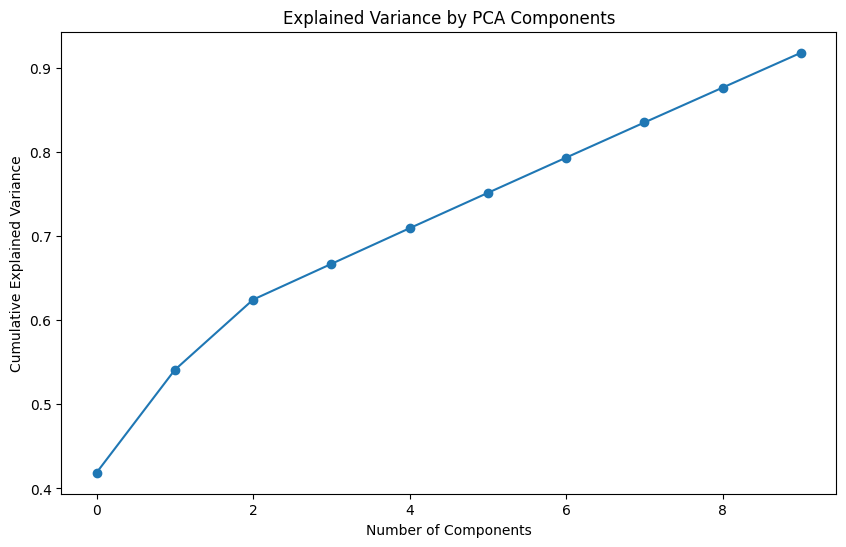

[0.41868995 0.12226835 0.08356246 0.04251067 0.04244043 0.04207342
 0.04191187 0.04179137 0.04148545 0.04141626]
Tổng phương sai giữ lại: 0.9181502274965071


In [9]:
# 2.2. Phân tích và trực quan hóa dữ liệu

# Giảm chiều bằng PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(data.drop("Churn Flag", axis=1))
explained_variance = pca.explained_variance_ratio_

# Biểu đồ Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()
print(pca.explained_variance_ratio_)
print("Tổng phương sai giữ lại:", sum(pca.explained_variance_ratio_))

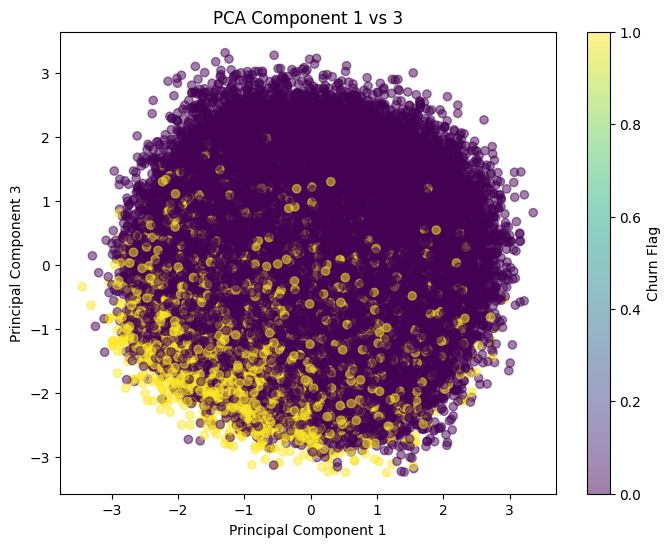

In [10]:
    # # Visualize các thành phần chính PCA
    # for i in range(4):
    #     plt.figure(figsize=(8, 6))
    #     plt.scatter(pca_data[:, i+3], pca_data[:, i+4], c=data["Churn Flag"], cmap="viridis", alpha=0.5)
    #     plt.xlabel(f"Principal Component {i+4}")
    #     plt.ylabel(f"Principal Component {i+5}")
    #     plt.title(f"PCA Component {i+4} vs {i+5}")
    #     plt.colorbar(label="Churn Flag")
    #     plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 5], pca_data[:, 7], c=data["Churn Flag"], cmap="viridis", alpha=0.5)
plt.xlabel(f"Principal Component {1}")
plt.ylabel(f"Principal Component {3}")
plt.title(f"PCA Component {1} vs {3}")
plt.colorbar(label="Churn Flag")
plt.show()

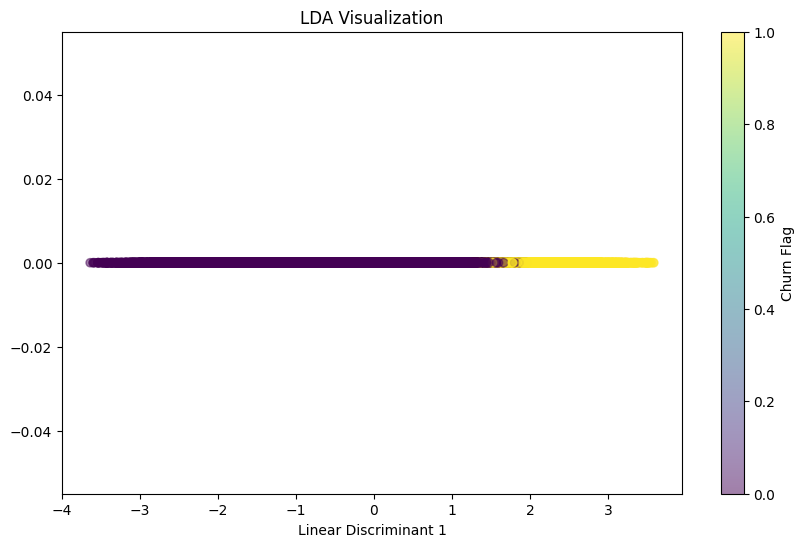

In [11]:
# Giảm chiều bằng LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda_data = lda.fit_transform(data.drop("Churn Flag", axis=1), data["Churn Flag"])

# Visualize LDA
plt.figure(figsize=(10, 6))
plt.scatter(lda_data[:, 0], [0]*len(lda_data), c=data["Churn Flag"], cmap="viridis", alpha=0.5)
plt.title("LDA Visualization")
plt.colorbar(label="Churn Flag")
plt.xlabel("Linear Discriminant 1")
plt.show()

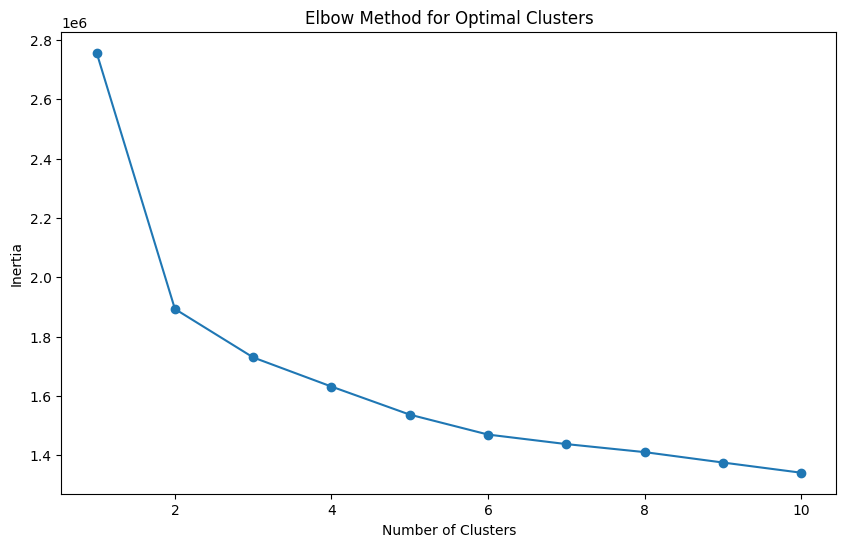

In [12]:
# 2.3. Phân cụm dữ liệu bằng K-Means

# Tìm số cụm tối ưu bằng phương pháp Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data.drop("Churn Flag", axis=1))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [13]:
# 2.4. Phân loại trên tập dữ liệu đã tiền xử lý và với tỉ lệ train:validation khác nhau

splits = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]
X = data.drop(["Churn Flag"], axis=1)
y = data["Churn Flag"]

In [14]:
print("Phân loại với dữ liệu gốc:")
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nTrain-Test Split: {train_size*100}-{test_size*100}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Phân loại với dữ liệu gốc:

Train-Test Split: 80.0-20.0
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20301
           1       0.94      0.79      0.86      2827

    accuracy                           0.97     23128
   macro avg       0.96      0.89      0.92     23128
weighted avg       0.97      0.97      0.97     23128

Confusion Matrix:
[[20164   137]
 [  586  2241]]

Train-Test Split: 70.0-30.0
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30419
           1       0.94      0.79      0.86      4273

    accuracy                           0.97     34692
   macro avg       0.96      0.89      0.92     34692
weighted avg       0.97      0.97      0.97     34692

Confusion Matrix:
[[30219   200]
 [  877  3396]]

Train-Test Split: 60.0-40.0
Classification Report:
              precision    recall  f1-score   support

          

In [15]:
# Phân loại với dữ liệu đã giảm chiều (PCA và LDA)
print("\nPhân loại với dữ liệu đã giảm chiều:")
for data_name, X_reduced in [("PCA", pca_data[:, :10]), ("LDA", lda_data)]:
    for train_size, test_size in splits:
        X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, train_size=train_size, random_state=42)
        model = GaussianNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n{data_name}: Train-Test Split: {train_size*100}-{test_size*100}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))


Phân loại với dữ liệu đã giảm chiều:

PCA: Train-Test Split: 80.0-20.0
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     20301
           1       1.00      0.37      0.54      2827

    accuracy                           0.92     23128
   macro avg       0.96      0.69      0.75     23128
weighted avg       0.93      0.92      0.91     23128

Confusion Matrix:
[[20301     0]
 [ 1777  1050]]

PCA: Train-Test Split: 70.0-30.0
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30419
           1       1.00      0.37      0.54      4273

    accuracy                           0.92     34692
   macro avg       0.96      0.68      0.75     34692
weighted avg       0.93      0.92      0.91     34692

Confusion Matrix:
[[30419     0]
 [ 2696  1577]]

PCA: Train-Test Split: 60.0-40.0
Classification Report:
              precision    recall  f1-s

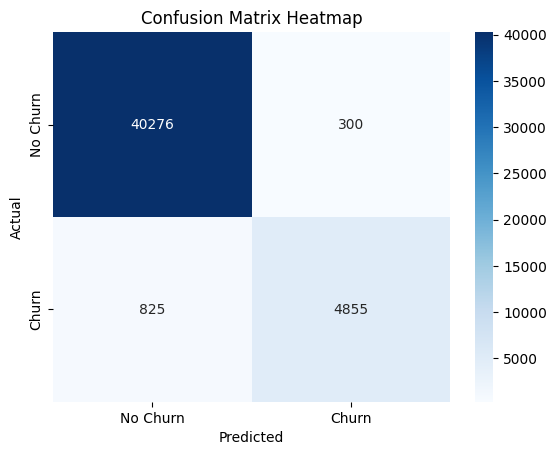

In [16]:
# Trực quan hóa Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
